**SETUP AND IMPORTS**

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the processed dataset
df = pd.read_csv('../data/drought_dataset_processed.csv')

print("\n" + "=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)

print(f"\n📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"📅 Time Period: {df['date'].min()} to {df['date'].max()}")
print(f"🌍 Region: Maharashtra, India")

print("\n" + "-" * 70)
print("Column Names and Types:")
print("-" * 70)
print(df.dtypes)

print("\n" + "-" * 70)
print("First 10 Rows:")
print("-" * 70)
df.head(10)


DATASET OVERVIEW

📊 Dataset Shape: 118 rows × 19 columns
📅 Time Period: 2015-01 to 2024-10
🌍 Region: Maharashtra, India

----------------------------------------------------------------------
Column Names and Types:
----------------------------------------------------------------------
year                   int64
month                  int64
date                  object
ndvi                 float64
precipitation_mm     float64
temp_mean_c          float64
temp_max_c           float64
temp_min_c           float64
precip_3month        float64
precip_6month        float64
ndvi_3month_avg      float64
precip_3month_avg    float64
precip_lag1          float64
ndvi_lag1            float64
vci                  float64
precip_anomaly       float64
drought_label          int64
drought_category      object
season                object
dtype: object

----------------------------------------------------------------------
First 10 Rows:
------------------------------------------------------------

,year,month,date,ndvi,precipitation_mm,temp_mean_c,temp_max_c,temp_min_c,precip_3month,precip_6month,ndvi_3month_avg,precip_3month_avg,precip_lag1,ndvi_lag1,vci,precip_anomaly,drought_label,drought_category,season
0,2015,1,2015-01,0.4483,5.35,21.45,28.00,16.02,5.35,5.35,0.448300,5.350000,NaN,NaN,46.981802,23.785285,2,Severe Drought,Winter
1,2015,2,2015-02,0.3881,3.51,24.86,31.92,18.62,8.86,8.86,0.418200,4.430000,5.35,0.4483,33.621838,-5.416330,2,Severe Drought,Winter
2,2015,3,2015-03,0.3612,14.07,27.32,33.43,21.86,22.93,22.93,0.399200,7.643333,3.51,0.3881,27.652020,88.026193,2,Severe Drought,Summer
3,2015,4,2015-04,0.3317,17.72,29.89,36.08,24.54,35.30,40.65,0.360333,11.766667,14.07,0.3612,21.105193,22.139509,2,Severe Drought,Summer
4,2015,5,2015-05,0.3082,25.22,32.97,39.19,27.69,57.01,65.87,0.333700,19.003333,17.72,0.3317,15.889925,-20.649404,2,Severe Drought,Summer
5,2015,6,2015-06,0.3730,230.61,28.90,33.22,25.58,273.55,296.48,0.337633,91.183333,25.22,0.3082,30.270750,18.931213,1,Moderate Drought,Monsoon
6,2015,7,2015-07,0.4009,142.82,28.29,31.91,25.34,398.65,433.95,0.360700,132.883333,230.61,0.3730,36.462494,-54.941539,1,Moderate Drought,Monsoon
7,2015,8,2015-08,0.5775,183.03,26.98,30.26,24.46,556.46,613.47,0.450467,185.486667,142.82,0.4009,75.654683,-21.449723,0,No Drought,Monsoon
8,2015,9,2015-09,0.6344,192.43,27.26,31.42,24.02,518.28,791.83,0.537600,172.760000,183.03,0.5775,88.282290,-17.083554,0,No Drought,Monsoon
9,2015,10,2015-10,0.5820,39.41,27.77,33.24,23.14,414.87,813.52,0.597967,138.290000,192.43,0.6344,76.653351,-54.790010,0,No Drought,Post-Monsoon


In [4]:
print("\n" + "=" * 70)
print("BASIC STATISTICS")
print("=" * 70)

print("\n📈 Numerical Features Summary:")
print("-" * 70)
df.describe().round(2)


BASIC STATISTICS

📈 Numerical Features Summary:
----------------------------------------------------------------------


,year,month,ndvi,precipitation_mm,temp_mean_c,temp_max_c,temp_min_c,precip_3month,precip_6month,ndvi_3month_avg,precip_3month_avg,precip_lag1,ndvi_lag1,vci,precip_anomaly,drought_label
count,118.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00,118.00,117.00,117.00,118.00,118.00,118.00
mean,2019.42,6.42,0.45,96.92,27.05,32.14,23.02,287.37,555.43,0.44,95.83,96.96,0.44,46.33,0.00,1.08
std,2.85,3.43,0.12,118.77,2.47,2.64,2.76,297.61,407.71,0.11,99.16,119.28,0.12,27.29,43.51,0.93
min,2015.00,1.00,0.24,1.37,21.40,28.00,15.31,5.35,5.35,0.26,2.51,1.37,0.24,0.00,-82.38,0.00
25%,2017.00,3.25,0.34,5.39,26.54,30.92,22.85,22.98,151.59,0.35,7.66,5.38,0.34,23.33,-32.96,0.00
50%,2019.00,6.00,0.43,25.79,26.86,31.61,23.56,165.70,569.94,0.43,55.23,25.22,0.43,43.18,-3.44,1.00
75%,2022.00,9.00,0.55,190.97,27.24,31.92,24.04,552.60,903.67,0.53,184.20,191.01,0.55,68.95,23.03,2.00
max,2024.00,12.00,0.69,444.78,33.74,39.65,28.19,995.51,1363.11,0.65,331.84,444.78,0.69,100.00,123.79,2.00


In [5]:
print("\n" + "=" * 70)
print("MISSING DATA ANALYSIS")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_pct
}).sort_values('Missing Values', ascending=False)

print("\n" + missing_df[missing_df['Missing Values'] > 0].to_string())

if missing_df['Missing Values'].sum() == 0:
    print("\n✓ No missing values! Dataset is complete.")


MISSING DATA ANALYSIS

             Missing Values  Percentage
ndvi_lag1                 1    0.847458
precip_lag1               1    0.847458



DROUGHT DISTRIBUTION

📊 Drought Category Distribution:
----------------------------------------------------------------------
No Drought          :  46 months ( 39.0%)
Moderate Drought    :  16 months ( 13.6%)
Severe Drought      :  56 months ( 47.5%)


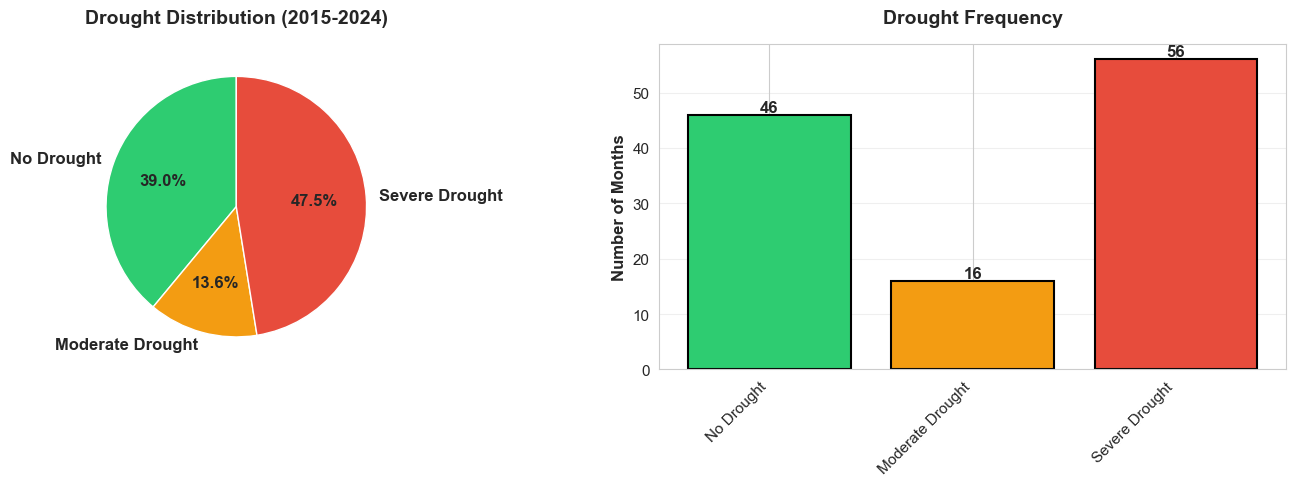


✓ Visualization saved: outputs/drought_distribution.png


In [6]:
print("\n" + "=" * 70)
print("DROUGHT DISTRIBUTION")
print("=" * 70)

# Count and percentage
drought_counts = df['drought_category'].value_counts()
drought_pct = (drought_counts / len(df) * 100).round(1)

print("\n📊 Drought Category Distribution:")
print("-" * 70)
for category in ['No Drought', 'Moderate Drought', 'Severe Drought']:
    if category in drought_counts.index:
        count = drought_counts[category]
        pct = drought_pct[category]
        print(f"{category:20s}: {count:3d} months ({pct:5.1f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
colors_pie = {'No Drought': '#2ecc71', 'Moderate Drought': '#f39c12', 'Severe Drought': '#e74c3c'}
drought_counts_sorted = drought_counts.reindex(['No Drought', 'Moderate Drought', 'Severe Drought'])
axes[0].pie(drought_counts_sorted, labels=drought_counts_sorted.index, autopct='%1.1f%%',
            colors=[colors_pie[x] for x in drought_counts_sorted.index],
            startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[0].set_title('Drought Distribution (2015-2024)', fontsize=14, fontweight='bold', pad=15)

# Bar chart
bars = axes[1].bar(range(len(drought_counts_sorted)), drought_counts_sorted.values,
                    color=[colors_pie[x] for x in drought_counts_sorted.index],
                    edgecolor='black', linewidth=1.5)
axes[1].set_xticks(range(len(drought_counts_sorted)))
axes[1].set_xticklabels(drought_counts_sorted.index, rotation=45, ha='right')
axes[1].set_ylabel('Number of Months', fontsize=12, fontweight='bold')
axes[1].set_title('Drought Frequency', fontsize=14, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/drought_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved: outputs/drought_distribution.png")


TEMPORAL PATTERNS


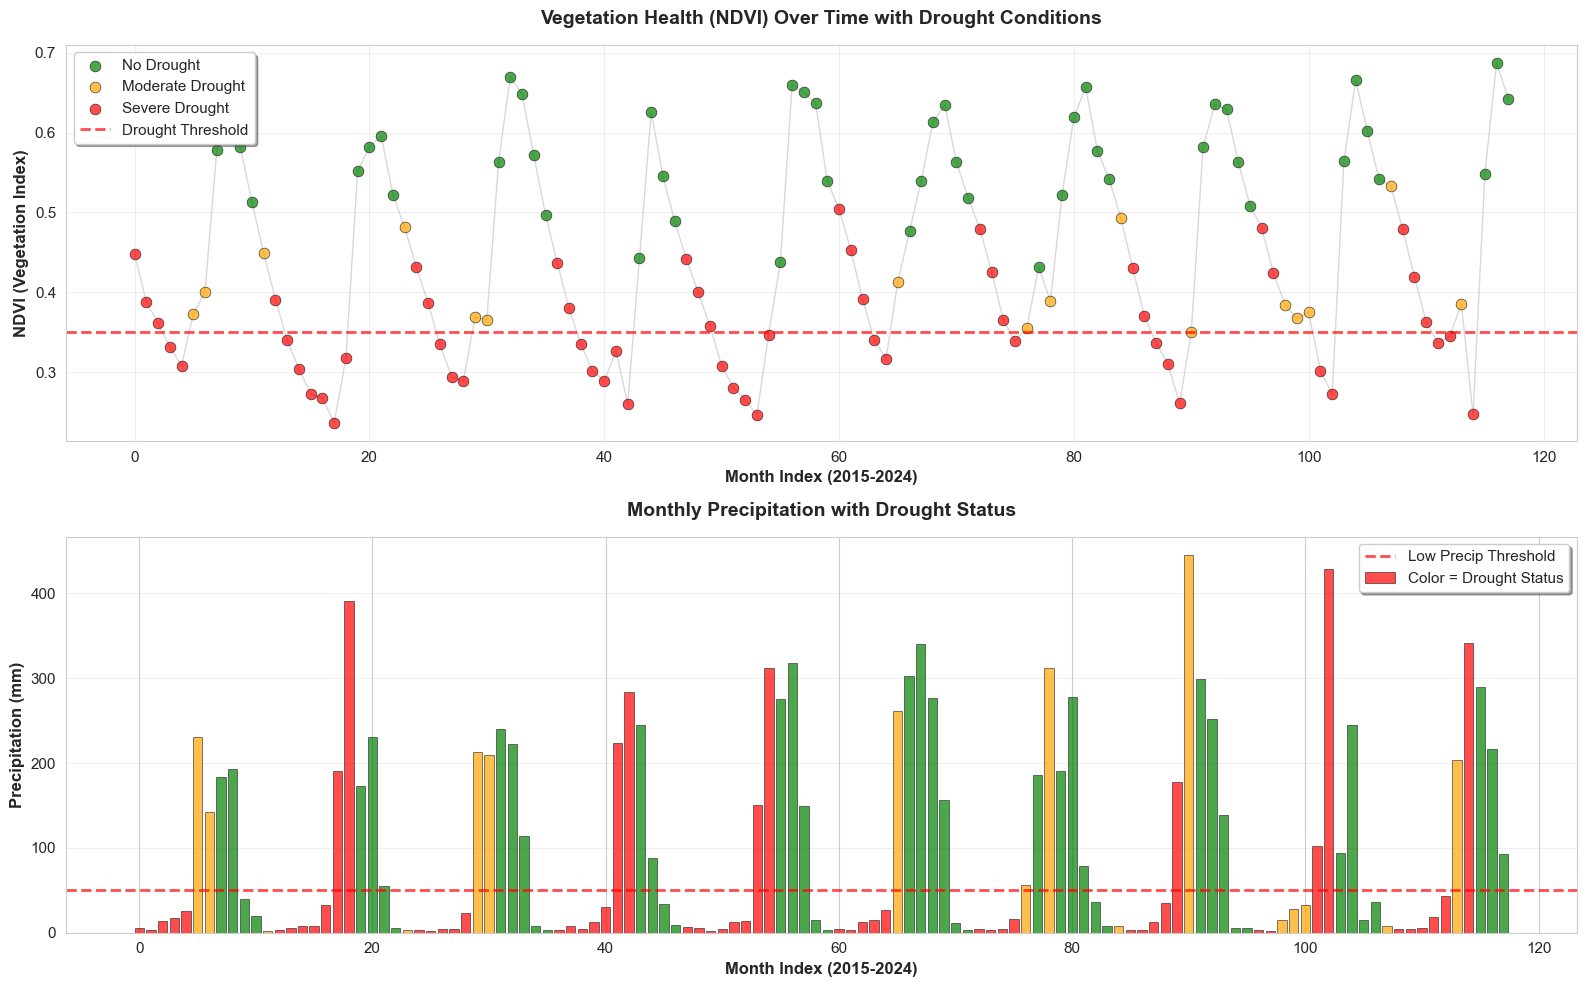


✓ Temporal analysis complete!
✓ Visualization saved: outputs/temporal_patterns.png


In [7]:
print("\n" + "=" * 70)
print("TEMPORAL PATTERNS")
print("=" * 70)

# Create time series plot
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Color mapping
color_map = {'No Drought': 'green', 'Moderate Drought': 'orange', 'Severe Drought': 'red'}

# Plot 1: NDVI over time
for category in ['No Drought', 'Moderate Drought', 'Severe Drought']:
    mask = df['drought_category'] == category
    axes[0].scatter(df[mask].index, df[mask]['ndvi'], 
                   label=category, color=color_map[category], 
                   alpha=0.7, s=60, edgecolors='black', linewidth=0.5)

axes[0].plot(df.index, df['ndvi'], color='gray', alpha=0.3, linewidth=1, zorder=0)
axes[0].axhline(y=0.35, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Drought Threshold')
axes[0].set_xlabel('Month Index (2015-2024)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('NDVI (Vegetation Index)', fontsize=12, fontweight='bold')
axes[0].set_title('Vegetation Health (NDVI) Over Time with Drought Conditions', 
                 fontsize=14, fontweight='bold', pad=15)
axes[0].legend(loc='best', frameon=True, shadow=True)
axes[0].grid(alpha=0.3)

# Plot 2: Precipitation over time
bars = axes[1].bar(df.index, df['precipitation_mm'],
                   color=[color_map[cat] for cat in df['drought_category']],
                   alpha=0.7, edgecolor='black', linewidth=0.5)
axes[1].axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Low Precipitation Threshold')
axes[1].set_xlabel('Month Index (2015-2024)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Precipitation (mm)', fontsize=12, fontweight='bold')
axes[1].set_title('Monthly Precipitation with Drought Status', 
                 fontsize=14, fontweight='bold', pad=15)
axes[1].legend(['Low Precip Threshold', 'Color = Drought Status'], loc='best', frameon=True, shadow=True)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Temporal analysis complete!")
print("✓ Visualization saved: outputs/temporal_patterns.png")


FEATURE CORRELATIONS


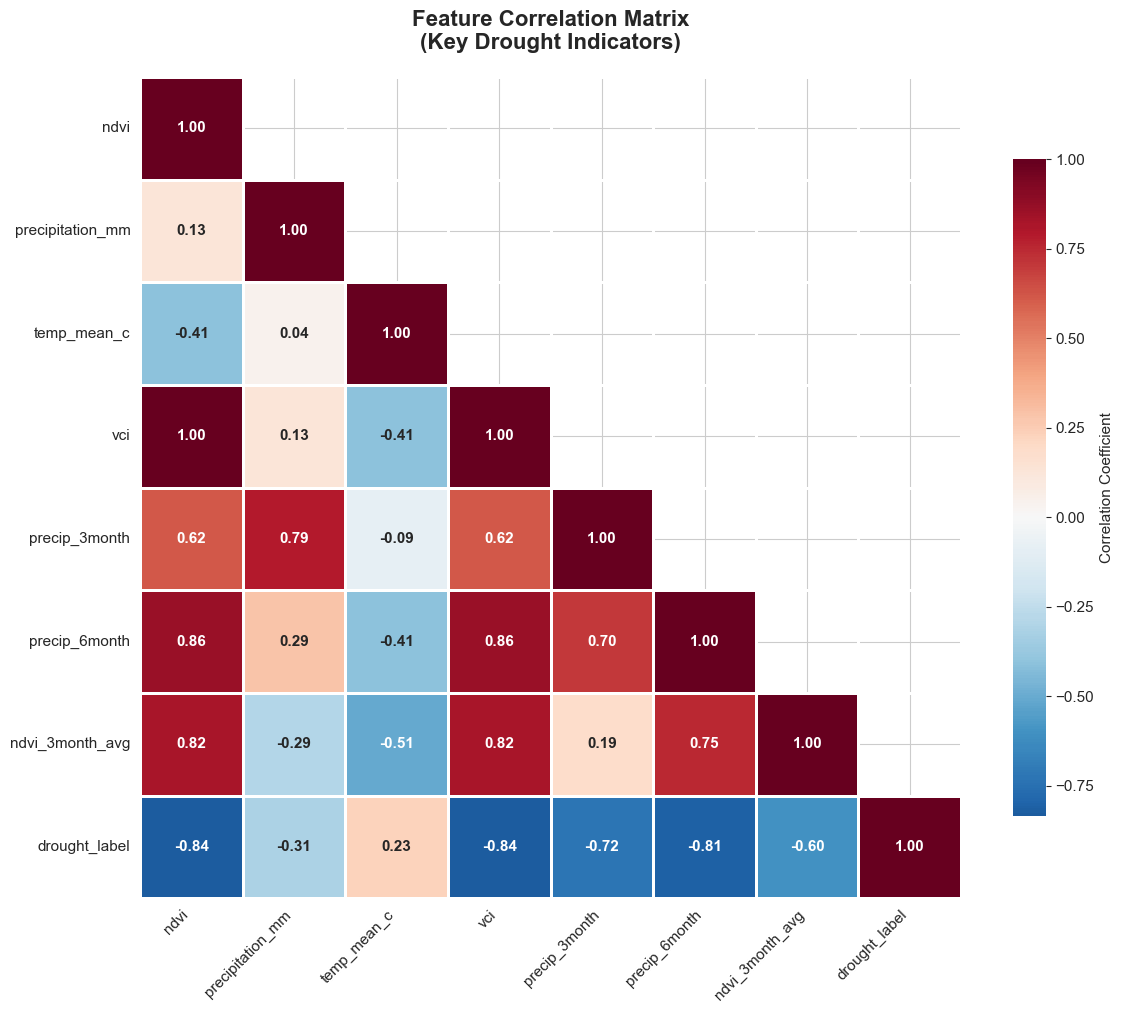


📊 Top Correlations with Drought Label:
----------------------------------------------------------------------
temp_mean_c              :  0.227
precipitation_mm         : -0.314
ndvi_3month_avg          : -0.599
precip_3month            : -0.721
precip_6month            : -0.810
vci                      : -0.835
ndvi                     : -0.835

✓ Correlation analysis complete!
✓ Visualization saved: outputs/correlation_matrix.png


In [8]:
print("\n" + "=" * 70)
print("FEATURE CORRELATIONS")
print("=" * 70)

# Select key features for correlation
key_features = ['ndvi', 'precipitation_mm', 'temp_mean_c', 'vci', 
                'precip_3month', 'precip_6month', 'ndvi_3month_avg', 'drought_label']

corr_matrix = df[key_features].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Feature Correlation Matrix\n(Key Drought Indicators)', 
         fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.savefig('../outputs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Top Correlations with Drought Label:")
print("-" * 70)
drought_corr = corr_matrix['drought_label'].sort_values(ascending=False)
for feature, corr in drought_corr.items():
    if feature != 'drought_label':
        print(f"{feature:25s}: {corr:6.3f}")

print("\n✓ Correlation analysis complete!")
print("✓ Visualization saved: outputs/correlation_matrix.png")


SEASONAL ANALYSIS

📊 Average Values by Season:
----------------------------------------------------------------------
               ndvi  precipitation_mm  temp_mean_c     vci
season                                                    
Monsoon       0.462           243.989       27.231  50.085
Post-Monsoon  0.587            53.591       26.308  77.862
Summer        0.328            17.925       29.396  20.309
Winter        0.450             4.186       24.840  47.420


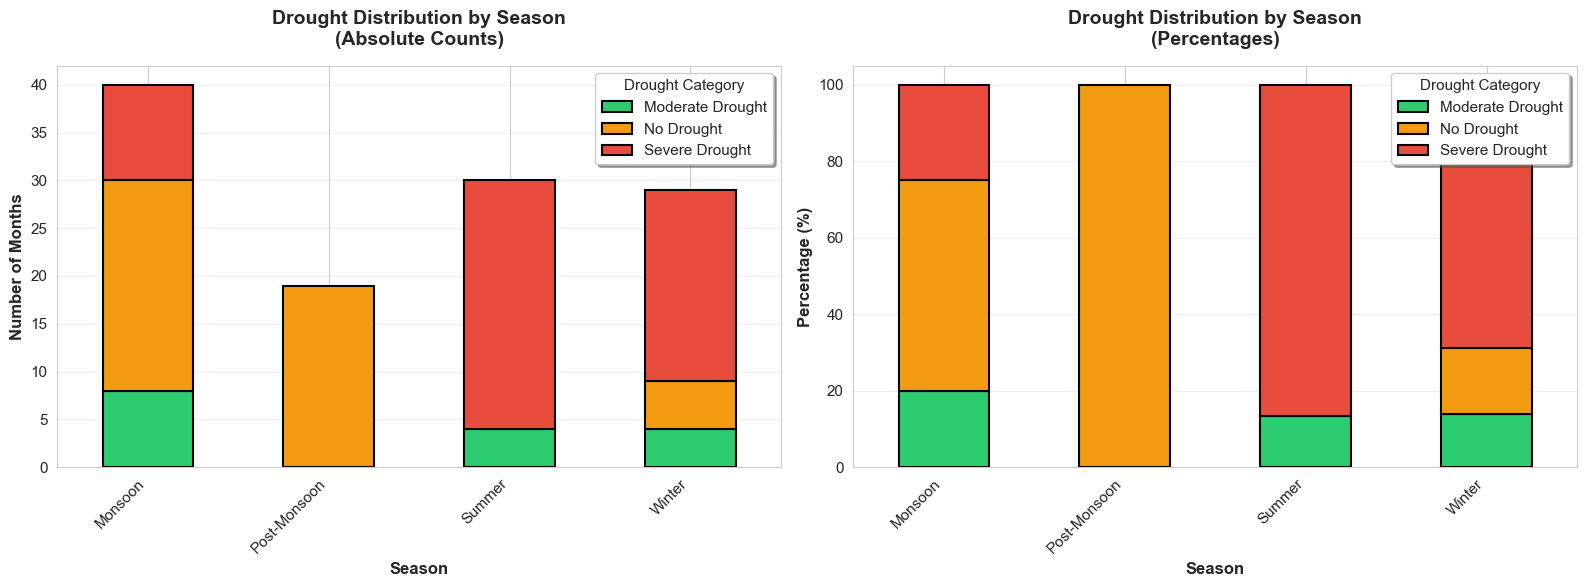


✓ Seasonal analysis complete!
✓ Visualization saved: outputs/seasonal_analysis.png


In [9]:
print("\n" + "=" * 70)
print("SEASONAL ANALYSIS")
print("=" * 70)

# Seasonal statistics
seasonal_stats = df.groupby('season').agg({
    'ndvi': 'mean',
    'precipitation_mm': 'mean',
    'temp_mean_c': 'mean',
    'vci': 'mean'
}).round(3)

print("\n📊 Average Values by Season:")
print("-" * 70)
print(seasonal_stats)

# Drought distribution by season
season_drought = pd.crosstab(df['season'], df['drought_category'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart
season_drought.plot(kind='bar', stacked=True, ax=axes[0],
                   color=['#2ecc71', '#f39c12', '#e74c3c'],
                   edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Season', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Months', fontsize=12, fontweight='bold')
axes[0].set_title('Drought Distribution by Season\n(Absolute Counts)', 
                 fontsize=14, fontweight='bold', pad=15)
axes[0].legend(title='Drought Category', frameon=True, shadow=True)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].grid(axis='y', alpha=0.3)

# Normalized (percentage) bar chart
season_drought_pct = season_drought.div(season_drought.sum(axis=1), axis=0) * 100
season_drought_pct.plot(kind='bar', stacked=True, ax=axes[1],
                       color=['#2ecc71', '#f39c12', '#e74c3c'],
                       edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Season', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Drought Distribution by Season\n(Percentages)', 
                 fontsize=14, fontweight='bold', pad=15)
axes[1].legend(title='Drought Category', frameon=True, shadow=True)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/seasonal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Seasonal analysis complete!")
print("✓ Visualization saved: outputs/seasonal_analysis.png")